In [10]:
# Author: Hassan Ali
# Problem 5.1 (kNN)
# Dataset: hsbdemo.csv
# Columns (expected): id, female, ses, schtyp, prog, read, write, math, science, socst, ...
# Specifically need: read, write, math, science, and prog

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# STEP 1: Load the hsbdemo dataset
df = pd.read_csv("hsbdemo.csv")  # Adjust path/filename if needed

# STEP 2: Quick check of columns in the dataset
print("Columns in dataset:", df.columns)

# STEP 3: Separate features (X) and target (y)
# Use 'read', 'write', 'math', 'science' as the predictor features.
# The target variable is 'prog', which categorizes the program (e.g., academic, general, vocation).
X = df[["read", "write", "math", "science"]]
y = df["prog"]

# STEP 4: Split the data into training (70%) and testing (30%) sets with stratification on the target variable.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# STEP 5: Initialize the k-Nearest Neighbors Classifier
# Here, k (the number of neighbors) is set to 5. This parameter can be tuned for better performance.
knn = KNeighborsClassifier(n_neighbors=5)

# STEP 6: Train the kNN classifier using the training set
knn.fit(X_train, y_train)

# STEP 7: Predict the target values for the test set
y_pred = knn.predict(X_test)

# STEP 8: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("\nkNN Classification Results (Problem 5.1)")
print("----------------------------------------")
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Columns in dataset: Index(['Unnamed: 0', 'id', 'female', 'ses', 'schtyp', 'prog', 'read', 'write',
       'math', 'science', 'socst', 'honors', 'awards', 'cid'],
      dtype='object')

kNN Classification Results (Problem 5.1)
----------------------------------------
Accuracy: 0.517

Classification Report:
              precision    recall  f1-score   support

    academic       0.60      0.84      0.70        32
     general       0.00      0.00      0.00        13
    vocation       0.44      0.27      0.33        15

    accuracy                           0.52        60
   macro avg       0.35      0.37      0.34        60
weighted avg       0.43      0.52      0.46        60

Confusion Matrix:
[[27  2  3]
 [11  0  2]
 [ 7  4  4]]


In [ ]:
# Analyzing of kNN Classification on hsbdemo.csv:

# - Dataset and Features:
#  - The hsbdemo dataset includes various student-related attributes.
#  - For this analysis, the features used are 'read', 'write', 'math', and 'science', and the target variable is 'prog' 
#    (representing different program types such as academic, general, or vocation).

#- Data Splitting:
#  - The data was split into 70% training and 30% testing sets with stratification to maintain the distribution of the target variable.

# - Model Training:
#  - A k-Nearest Neighbors classifier with k=5 was trained on the training data.

# - Performance:
#  - The overall test accuracy is approximately 51.7%, indicating that about half of the predictions are correct.
#  - The classification report shows:
#      • For the 'academic' program: high recall (0.84) but moderate precision (0.60), yielding an f1-score of 0.70.
#      • For the 'general' program: the model fails to predict any cases correctly (precision, recall, and f1-score are 0.00).
#     • For the 'vocation' program: moderate performance with an f1-score of 0.33.
#  - The confusion matrix indicates that many 'general' cases are misclassified as 'academic' or 'vocation', and there is overlap between 'academic' and 'vocation' classes.

#  - The low overall accuracy and poor performance on the 'general' class suggest that the chosen features may not be sufficient 
#    to distinguish between all program types.
#  - The model performs best on the 'academic' class but struggles with 'general' and 'vocation', which may require additional features 
#    or different modeling techniques to improve classification performance.
#  - Future improvements might include tuning the number of neighbors, incorporating additional predictors, or exploring alternative algorithms.

# Overall, the kNN classifier shows moderate performance, highlighting the need for further feature exploration or model tuning to better classify the different program types.


Decision Tree Classification Results (Problem 5.5)
-----------------------------------------
Accuracy: 0.874

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       117
           1       0.60      0.17      0.26        18

    accuracy                           0.87       135
   macro avg       0.74      0.57      0.60       135
weighted avg       0.85      0.87      0.84       135

Confusion Matrix:
[[115   2]
 [ 15   3]]


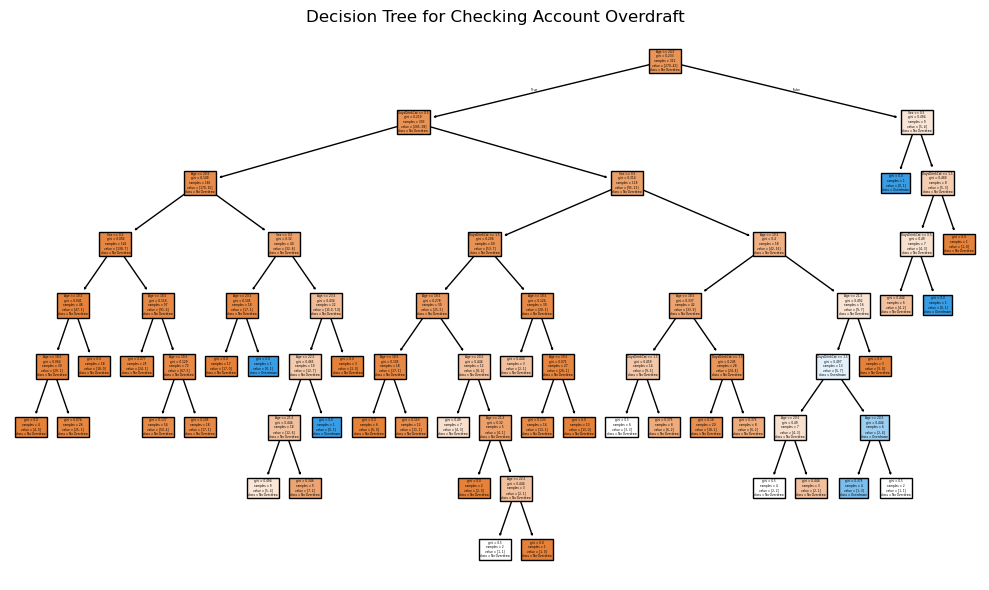

In [12]:
# Author: Hassan Ali
# Problem 5.5 (Decision Tree)
# Dataset: overdrawn.csv
# Columns (expected):
#    Age, Sex, DaysDrink, Overdrawn
# Specifically need: Age, Sex, DaysDrinkCat (derived from DaysDrink) and target Overdrawn
#
# Goal:
#  - Convert DaysDrink into a categorical variable (DaysDrinkCat) with bins:
#       0 if < 7, 1 if between 7 and 14, 2 if > 14.
#  - Build a decision tree classifier to predict Overdrawn (0 = no, 1 = yes)
#  - Evaluate the model and visualize the decision tree.
#
# The following code follows the structure, layout, comments, and methodology from the reference notebooks.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# STEP 1: Load the dataset
# Load the hsbdemo dataset (in this case, overdrawn.csv) into a DataFrame.
df = pd.read_csv("overdrawn.csv")  # Adjust path/filename if needed

# STEP 2: Data Cleaning
# Drop rows with missing values in 'DaysDrink' or 'Overdrawn'
df = df.dropna(subset=["DaysDrink", "Overdrawn"]).copy()
# Ensure the target variable 'Overdrawn' is of integer type.
df["Overdrawn"] = df["Overdrawn"].astype(int)

# STEP 3: Create a Categorical Variable for DaysDrink
# Bin 'DaysDrink' into 3 categories:
#   - 0 if DaysDrink < 7,
#   - 1 if 7 <= DaysDrink <= 14,
#   - 2 if DaysDrink > 14.
df["DaysDrinkCat"] = pd.cut(
    df["DaysDrink"],
    bins=[-1, 6, 14, np.inf],
    labels=[0, 1, 2]
)

# Remove any rows where the binning resulted in NaN (e.g., if DaysDrink was negative)
df = df.dropna(subset=["DaysDrinkCat"]).copy()
# Convert the DaysDrinkCat column to integer type
df["DaysDrinkCat"] = df["DaysDrinkCat"].astype(int)

# STEP 4: Define Features and Target
# Features: Age, Sex, and DaysDrinkCat
# Target: Overdrawn (0 = no, 1 = yes)
X = df[["Age", "Sex", "DaysDrinkCat"]]
y = df["Overdrawn"]

# STEP 5: Split the Data into Training (70%) and Testing (30%) Sets
# Stratify the split by the target variable to maintain class proportions.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# STEP 6: Initialize and Train the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# STEP 7: Predict on the Test Set
y_pred = tree_clf.predict(X_test)

# STEP 8: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("\nDecision Tree Classification Results (Problem 5.5)")
print("-----------------------------------------")
print(f"Accuracy: {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# STEP 9: Visualize the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(
    tree_clf,
    feature_names=["Age", "Sex", "DaysDrinkCat"],
    class_names=["No Overdraw", "Overdrawn"],
    filled=True
)
plt.title("Decision Tree for Checking Account Overdraft")
plt.tight_layout()
plt.show()

In [ ]:
# Analyzing of Decision Tree Classification on overdrawn.csv:
#
# - Accuracy: 0.874
#   The model achieves an overall accuracy of 87.4%, indicating that most predictions are correct.
#
# - Classification Report:
#   - For class 0 (Not Overdrawn):
#       • Precision: 0.88, Recall: 0.98, F1-score: 0.93
#       • This suggests the model is very effective at identifying non-overdrawn accounts.
#   - For class 1 (Overdrawn):
#       • Precision: 0.60, Recall: 0.17, F1-score: 0.26
#       • The low recall indicates that the model misses many overdrawn cases.
#
# - Confusion Matrix:
#   [[115   2]
#    [ 15   3]]
#   - There are 115 true negatives and 2 false positives for class 0.
#   - For class 1, there are only 3 true positives and 15 false negatives.
#
# - Interpretation:
#   - Despite the high overall accuracy, the model performs poorly on the minority class (Overdrawn).
#   - The imbalance in predictions (favoring the majority class) suggests that the selected features (Age, Sex, DaysDrinkCat)
#     may not fully capture the factors that lead to an account being overdrawn.
#   - The high performance on class 0 (Not Overdrawn) comes at the cost of a very low recall for class 1 (Overdrawn),
#     indicating a potential risk in real-world scenarios where detecting overdraft is critical.
#
# - Conclusion:
#   - The decision tree model shows strong performance for predicting non-overdrawn accounts but struggles significantly
#     with identifying overdrawn cases.
#   - Future work should focus on addressing this imbalance, either by incorporating additional features, adjusting the model,
#     or using methods to mitigate class imbalance.

In [16]:
# Author: Hassan Ali
# Problem 5.7 (Random Forest)
# Dataset: abalone.csv
# Columns (expected, no header in CSV):
#    Sex, Length, Diameter, Height, Whole_weight,
#    Shucked_weight, Viscera_weight, Shell_weight, Rings
#
# Goal:
#  - Predict the number of Rings (which is used to estimate the age of an abalone)
#    using a Random Forest Regressor.
#  - The data is preprocessed by one-hot encoding the categorical 'Sex' column.
#  - The model is trained on 70% of the data and tested on 30%.
#  - After prediction, the predicted Rings are converted to predicted age (Rings + 1.5).
#  - The model is evaluated using MSE, MAE, R², and the R² score is interpreted as accuracy.
#  - A sample of predicted ages is printed for inspection.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# STEP 1: Define column names since abalone.csv usually has no header.
column_names = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole_weight",
    "Shucked_weight",
    "Viscera_weight",
    "Shell_weight",
    "Rings"
]

# STEP 2: Load the dataset
df = pd.read_csv("abalone.csv", header=None, names=column_names)

# STEP 3: Drop any rows with missing values.
df = df.dropna().copy()

# STEP 4: One-hot encode the 'Sex' column (values: M, F, I).
df_encoded = pd.get_dummies(df, columns=["Sex"], drop_first=True)

# STEP 5: Separate features (X) and target (y).
#         The target is "Rings" and the features are all columns except "Rings".
X = df_encoded.drop("Rings", axis=1)
y = df_encoded["Rings"]

# STEP 6: Split the data into training (70%) and testing (30%) sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# STEP 7: Initialize and train the Random Forest Regressor.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# STEP 8: Predict the number of rings on the test set.
y_pred_rings = rf_model.predict(X_test)

# STEP 9: Convert predicted rings to predicted age.
#         The age of an abalone is estimated as Rings + 1.5.
y_pred_age = y_pred_rings + 1.5

# STEP 10: Evaluate the model.
mse = mean_squared_error(y_test, y_pred_rings)
mae = mean_absolute_error(y_test, y_pred_rings)
r2  = r2_score(y_test, y_pred_rings)
accuracy = rf_model.score(X_test, y_test)  # Accuracy interpreted as R² in regression

print("\nRandom Forest Regression Results (Problem 5.7)")
print("---------------------------------------------")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.3f}")
print(f"Accuracy (R^2): {accuracy:.3f}")

# STEP 11: Print a sample of predicted ages.
print("\nSample of Predicted Ages (first 10):")
for i in range(min(10, len(y_pred_age))):
    print(f"Predicted Rings: {y_pred_rings[i]:.2f} -> Predicted Age: {y_pred_age[i]:.2f}")


Random Forest Regression Results (Problem 5.7)
---------------------------------------------
Mean Squared Error (MSE): 4.80
Mean Absolute Error (MAE): 1.55
R-squared (R2): 0.527
Accuracy (R^2): 0.527

Sample of Predicted Ages (first 10):
Predicted Rings: 12.34 -> Predicted Age: 13.84
Predicted Rings: 9.33 -> Predicted Age: 10.83
Predicted Rings: 14.93 -> Predicted Age: 16.43
Predicted Rings: 11.23 -> Predicted Age: 12.73
Predicted Rings: 12.76 -> Predicted Age: 14.26
Predicted Rings: 10.31 -> Predicted Age: 11.81
Predicted Rings: 8.74 -> Predicted Age: 10.24
Predicted Rings: 8.95 -> Predicted Age: 10.45
Predicted Rings: 7.19 -> Predicted Age: 8.69
Predicted Rings: 10.38 -> Predicted Age: 11.88


In [ ]:
# Analyzing of Random Forest Regression on Abalone Data:
#
# - Model Performance:
#   - Mean Squared Error (MSE) is 4.80, indicating that the average squared error between the predicted and actual ring counts is 4.80.
#   - Mean Absolute Error (MAE) is 1.55, meaning that on average, the predictions deviate from the actual ring counts by about 1.55 rings.
#   - R-squared (R2) is 0.527, so approximately 52.7% of the variance in ring counts is explained by the model.
#   - The R² value, interpreted as accuracy, is moderate, suggesting that the model explains just over half of the variation in the data.
#
# - Predicted Age Conversion:
#   - Predicted age is computed as the predicted rings plus 1.5. For instance, a predicted ring count of 12.34 corresponds to an estimated age of 13.84.
#
# - Interpretation:
#   - The performance metrics indicate that the Random Forest model captures some of the relationship between the features 
#     and the number of rings, but there is still considerable unexplained variance.
#   - The error metrics (MSE and MAE) suggest that while predictions are reasonably close to actual values, improvements are possible.
#
# - Conclusion:
#   - The Random Forest model demonstrates moderate predictive ability on the abalone dataset.
#   - Further improvements could include tuning model parameters, feature engineering, or trying alternative regression methods 
#     to achieve a higher R² and lower error rates.